# Visualize 3D data
#### In this notebook, I show how to visialzed 3d data by given an example. First, I define loss function a [Rosenbrock‐like](https://en.wikipedia.org/wiki/Rosenbrock_function) then I calculate gradint ans save its path. Finally, I draw everything.   

In [71]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # registers 3D projection
from matplotlib import cm
%matplotlib inline

### Define a “wavy” test‐function: a Rosenbrock‐like bowl plus sinusoidal bumps

In [72]:
# 1) Define a “wavy” test‐function: a Rosenbrock‐like bowl plus sinusoidal bumps
def loss_fn(X):
    x, y = X[:, 0], X[:, 1]
    # classic Rosenbrock term
    rosen = (1.0 - x)**2 + 100.0*(y - x**2)**2
    # small wavy perturbation
    bumps =  0.2 * tf.sin(3.0*x) * tf.sin(3.0*y)
    return rosen + bumps

### Build mesh‐grid in NumPy and evaluate loss in one big TensorFlow call

In [73]:

nx, ny = 200, 200
x = np.linspace(-2.0, 2.0, nx)
y = np.linspace(-1.0, 3.0, ny)
Xg, Yg = np.meshgrid(x, y)

### send to TF

In [74]:
XY_flat = tf.constant(np.stack([Xg.ravel(), Yg.ravel()], axis=1), dtype=tf.float32)
Z_flat  = loss_fn(XY_flat).numpy()
Zg      = Z_flat.reshape((ny, nx))

### Run simple gradient descent and record the path

In [75]:
lr = 5e-4
steps = 500
pt = tf.Variable([-0.8, 2.8], dtype=tf.float32)  # start point
trajectory = []

for i in range(steps):
    with tf.GradientTape() as tape:
        z = loss_fn(tf.reshape(pt, (1,2)))[0]
    grad = tape.gradient(z, pt)
    # print(grad)
    pt.assign_sub(lr * grad)
    trajectory.append(pt.numpy().copy())

traj = np.array(trajectory)  # shape (steps, 2)
# compute z‐values along the path
Z_traj = loss_fn(tf.constant(traj, dtype=tf.float32)).numpy()


### Plot everything

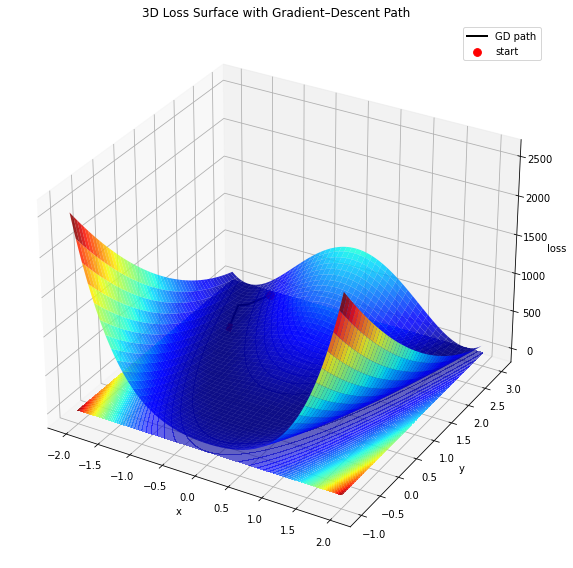

In [76]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111, projection='3d')

# — the colored surface
surf = ax.plot_surface(
    Xg, Yg, Zg,
    cmap=cm.jet, 
    alpha=0.85, 
    edgecolor='none'
)

# — contour projection underneath
z_min = Zg.min() - 5.0
ax.contourf(
    Xg, Yg, Zg, 
    zdir='z', offset=z_min, 
    levels=50, cmap=cm.jet, alpha=0.6
)

# — the descent path
ax.plot(
    traj[:,0], traj[:,1], Z_traj,
    color='k', linewidth=2, label='GD path'
)

# — starting point marker
ax.scatter(
    traj[0,0], traj[0,1], Z_traj[0],
    color='r', s=60, marker='o', label='start'
)

#— arrow on the last step
ax.quiver(
    traj[-2,0], traj[-2,1], Z_traj[-2],
    200 * (traj[-1,0]-traj[-2,0]), # Scale the x-direction
    200 * (traj[-1,1]-traj[-2,1]), # Scale the y-direction
    200 * (Z_traj[-1]-Z_traj[-2]), # Scale the z-direction
    color='r', 
    arrow_length_ratio=0.3,
    linewidth=5
)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('loss')
ax.set_title('3D Loss Surface with Gradient–Descent Path')
ax.view_init(elev=30, azim=-60)  # tilt/rotate for a nice angle
plt.legend()
plt.tight_layout()
plt.show()

### find more 

[3D Diagrams](https://www.geeksforgeeks.org/understanding-techniques-and-applications-of-3d-data-visualization/)